# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
import glob
import json
from src import utils
sns.set_theme(context='paper', style='dark', font_scale=4)

In [62]:
name="score_vs_R_k"
golden = (1 + 5 ** 0.5) / 2
font_scale = 3.5
fig_height = 7
type_dict = {
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'group_size' : float,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'N' : int,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))

data = []
for fl_id, fl in enumerate(files):
    with open(fl,"r") as f:
        df = pd.DataFrame.from_records([json.load(f)])
        data.append(df)

input_df = pd.concat(data)

In [29]:
total_df = input_df.astype(type_dict) # Fix types
total_df = total_df.rename(columns={"method": "Method", "score": "Score", 'r' : 'R'}) # Rename columns
total_df = total_df.replace({'dorfman': 'Dorfman', 'individual': 'Individual', 'negbin': 'Neg.Bin.'}) # Rename methods
total_df = total_df[total_df['Method']!='Individual']

In [158]:
results = {}
for N in [20, 100]:
    results[N] = total_df[(total_df['N']==N) & (total_df['lambda_1']==0.0) & (total_df['lambda_2']==0.0)]
    results[N] = results[N].pivot(index=['lambda_1', 'lambda_2', 'se', 'sp', 'R', 'k', 'seed', 'N'], columns='Method', values='Score').reset_index()
    results[N]['Percentage'] = (results[N]['Dorfman'] - results[N]['Neg.Bin.'])/results[N]['Dorfman']
    results[N] = results[N][['R','k','Percentage']]
    results[N] = results[N].groupby(['R', 'k']).mean().reset_index()
    results[N] = results[N].pivot('R', 'k', 'Percentage')

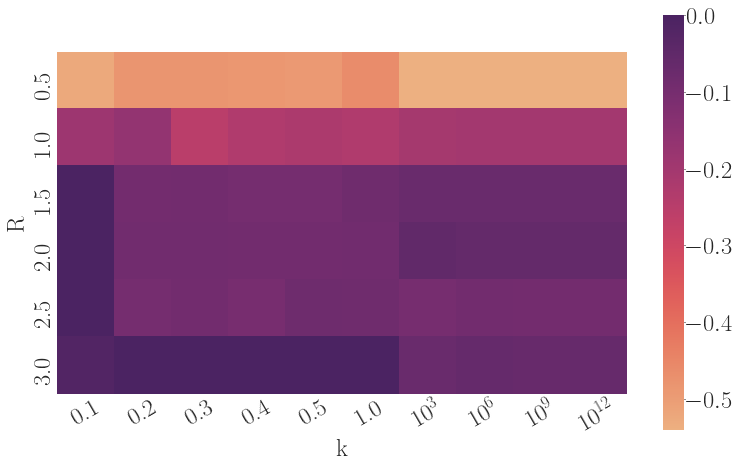

In [169]:
utils.latexify(fig_width=fig_height*golden, fig_height=fig_height, font_scale=font_scale)
k_ticks = ['0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '$10^3$', '$10^6$', '$10^9$', '$10^{12}$']

ax = sns.heatmap(data=results[20], cmap='flare', square=True)
ax.set_xticklabels(k_ticks)
for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("center")

plt.tight_layout()
plt.savefig('figures/{name}_N_20.pdf'.format(name=name))

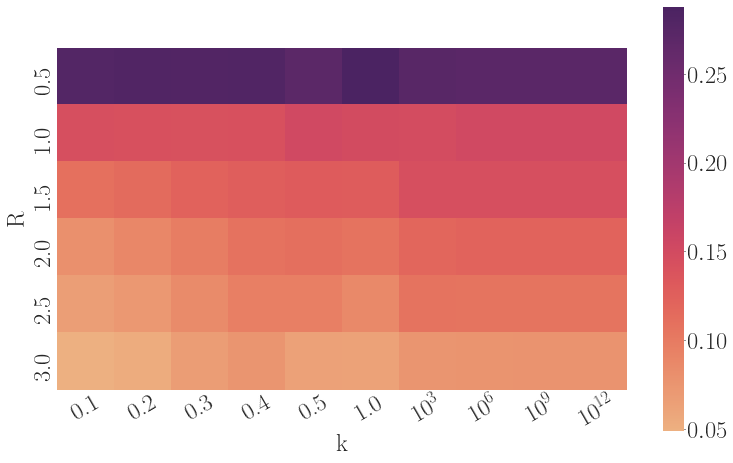

In [170]:
utils.latexify(fig_width=fig_height*golden, fig_height=fig_height, font_scale=font_scale)
k_ticks = ['0.1', '0.2', '0.3', '0.4', '0.5', '1.0', '$10^3$', '$10^6$', '$10^9$', '$10^{12}$']

ax = sns.heatmap(data=results[100], cmap='flare', square=True)
ax.set_xticklabels(k_ticks)
for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("center")

plt.tight_layout()
plt.savefig('figures/{name}_N_100.pdf'.format(name=name))